### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline
import time


In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [4]:
movielens = pd.read_csv('Dataset_Movielens.csv')
items = pd.read_csv('item.csv')
users = pd.read_csv('user.csv')
movielens.head()
items.head()
users.head() 

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [391]:
movielens.info()

movielens.shape

movielens.describe
movielens.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


(100000, 4)

<bound method NDFrame.describe of        user id  movie id  rating  timestamp
0          196       242       3  881250949
1          186       302       3  891717742
2           22       377       1  878887116
3          244        51       2  880606923
4          166       346       1  886397596
...        ...       ...     ...        ...
99995      880       476       3  880175444
99996      716       204       5  879795543
99997      276      1090       1  874795795
99998       13       225       2  882399156
99999       12       203       3  879959583

[100000 rows x 4 columns]>

0

In [8]:
items.info()
items.shape
items.describe
items.isnull().sum().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

(1681, 22)

<bound method NDFrame.describe of       movie id                          movie title release date  unknown  \
0            1                           Toy Story   01-Jan-1995        0   
1            2                           GoldenEye   01-Jan-1995        0   
2            3                          Four Rooms   01-Jan-1995        0   
3            4                          Get Shorty   01-Jan-1995        0   
4            5                             Copycat   01-Jan-1995        0   
...        ...                                  ...          ...      ...   
1676      1678                          Mat' i syn   06-Feb-1998        0   
1677      1679                           B. Monkey   06-Feb-1998        0   
1678      1680                       Sliding Doors   01-Jan-1998        0   
1679      1681                        You So Crazy   01-Jan-1994        0   
1680      1682  Scream of Stone (Schrei aus Stein)   08-Mar-1996        0   

      Action  Adventure  Animation  Child

0

In [9]:
users.info()
users.shape
users.describe
users.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


(943, 5)

<bound method NDFrame.describe of      user id  age gender     occupation zip code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]>

0

#### 4. Find the number of movies per genre using the item data - 5 marks

In [10]:
# use sum on the default axis
items.columns

Index(['movie id', 'movie title', 'release date', 'unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [395]:
items_genre=items.drop(['movie id', 'movie title', 'release date'], axis=1)
items[items['unknown'] > 0]
items_genre
items_genre[items_genre==True].count(axis=0)

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year


,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year
0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1995
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1995
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1995
3,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1995
4,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1998
1677,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1998
1678,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1998
1679,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1994


unknown          0
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
Year             0
dtype: int64

In [12]:
items.head()


,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


#### 5. Find the movies that have more than one genre - 2.5 marks

In [13]:
#hint: use sum on the axis = 1

items1=items.sum(axis = 1)
items2 = items1>1
items[items2]

#items.clip(lower=0).sum(axis=1)


,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [29]:
#items[items['unknown'] ==1]
indexNames = items[ items['unknown'] == 1 ].index
items.drop(indexNames , inplace=True)
items
items.count()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


movie id        1680
movie title     1680
release date    1680
unknown         1680
Action          1680
Adventure       1680
Animation       1680
Childrens       1680
Comedy          1680
Crime           1680
Documentary     1680
Drama           1680
Fantasy         1680
Film-Noir       1680
Horror          1680
Musical         1680
Mystery         1680
Romance         1680
Sci-Fi          1680
Thriller        1680
War             1680
Western         1680
dtype: int64

In [309]:
items.shape

(1680, 22)

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [ ]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [314]:
users

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [324]:
movielens

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


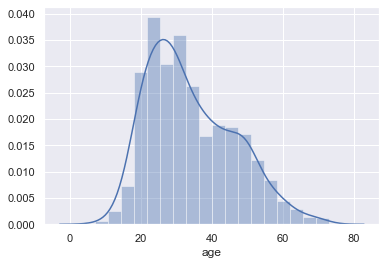

In [315]:
sns.distplot(users['age'])

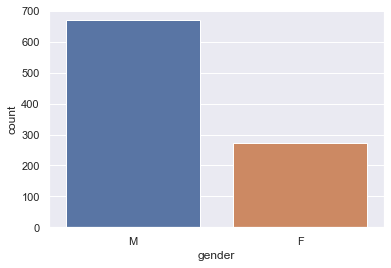

In [316]:
sns.countplot(x='gender', data=users)

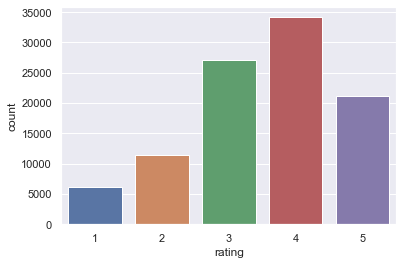

In [325]:
sns.countplot(x='rating', data=movielens)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text xticklabel objects>)

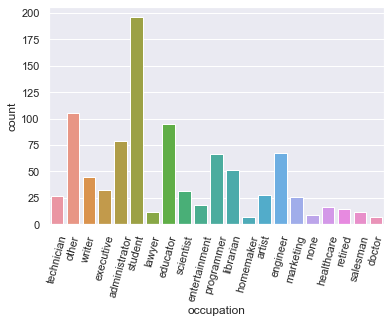

In [41]:
sns.countplot(x='occupation', data=users)
plt.xticks(rotation=75)

In [310]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


In [65]:
#your answers here
year = pd.DatetimeIndex(items['release date']).year
year
year.max()
year.min()
frames = [items, year]
items['Year']= year
items

Int64Index([1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1996,
            ...
            1995, 1962, 1996, 1996, 1996, 1998, 1998, 1998, 1994, 1996],
           dtype='int64', name='release date', length=1680)

1998

1922

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1995
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1998
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1998
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1998
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1994


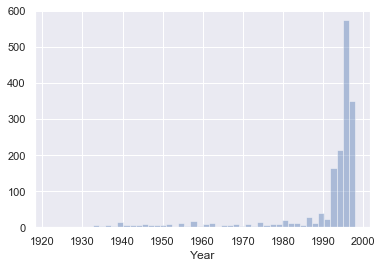

In [69]:
#ax = sns.distplot(x, fit=norm, kde=False)
sns.distplot(items['Year'], kde=False)

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [79]:
#Your answer here
items.columns


Index(['movie id', 'movie title', 'release date', 'unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'Year'],
      dtype='object')

In [85]:
new_df=items
new_df
new_df1=new_df.drop(['movie id', 'movie title', 'release date'], axis=1)
new_df1.set_index('Year')

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1995
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1998
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1998
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1998
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1994


,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Year,,,,,,,,,,,,,,,,,,,
1995,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1995,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1995,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1995,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1998,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [235]:
new_df2=new_df1.groupby(['Year']).sum()
new_df2
new_df2['Sum']=new_df2.sum(axis=1)
new_df2


,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Year,,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1926,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1930,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1931,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6
1995,0,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2
1996,0,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2


,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Sum
Year,,,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1926,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1930,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1931,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,3
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6,353
1995,0,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2,381
1996,0,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2,559


In [266]:
#new_df2
#new_df2.reset_index(level=0, inplace=True)
new_df2.reset_index()
#df3=new_df2.drop(columns=['level 0', 'index'])
#df3
df3=new_df2.reset_index()
df3


,Year,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Sum
0,1922,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1926,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1930,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1931,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,3
4,1932,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,1994,0,30,13,4,15,82,8,9,97,...,0,8,2,2,35,7,25,7,6,353
67,1995,0,40,22,6,21,63,11,5,89,...,1,14,3,5,37,15,39,5,2,381
68,1996,0,44,24,9,21,108,21,18,170,...,1,11,9,6,38,15,47,9,2,559
69,1997,0,46,20,3,22,87,30,6,113,...,2,8,5,18,51,13,54,14,0,496


,Year,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Sum
0,1922,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1926,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1930,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1931,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,3
4,1932,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,1994,0,30,13,4,15,82,8,9,97,...,0,8,2,2,35,7,25,7,6,353
67,1995,0,40,22,6,21,63,11,5,89,...,1,14,3,5,37,15,39,5,2,381
68,1996,0,44,24,9,21,108,21,18,170,...,1,11,9,6,38,15,47,9,2,559
69,1997,0,46,20,3,22,87,30,6,113,...,2,8,5,18,51,13,54,14,0,496


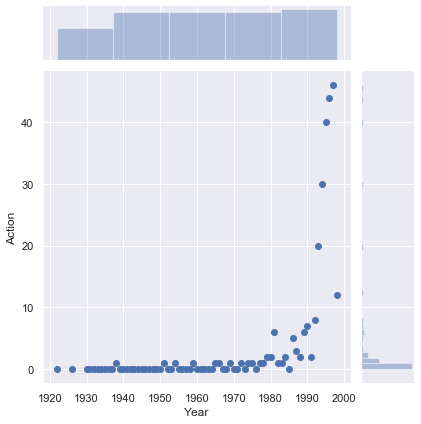

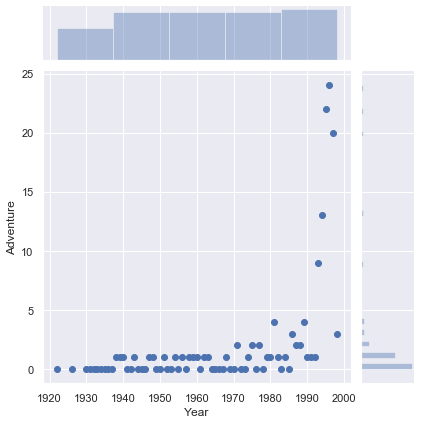

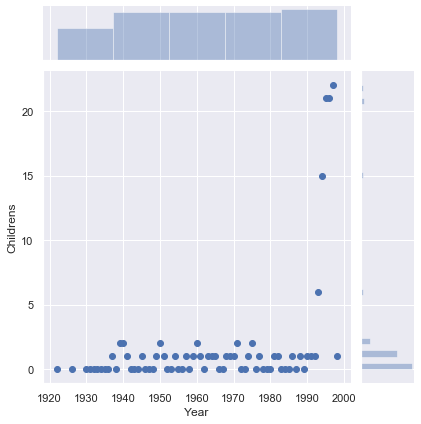

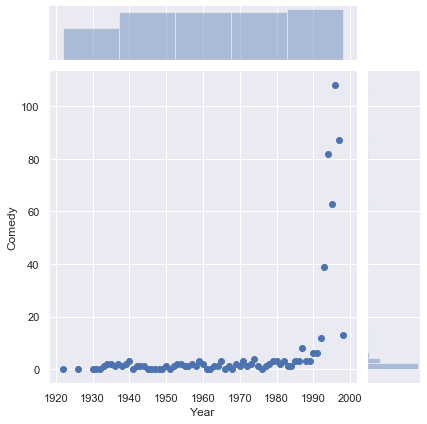

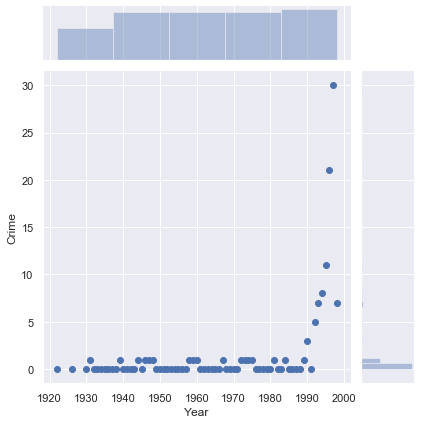

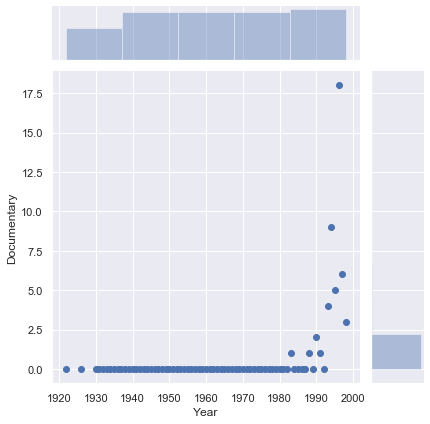

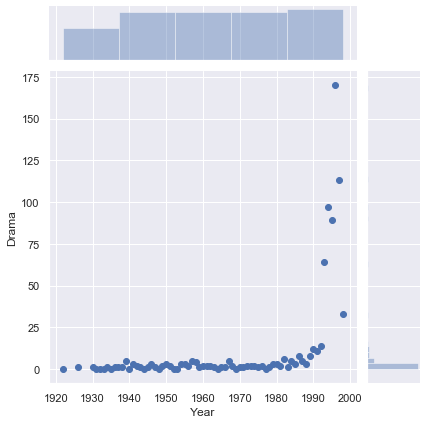

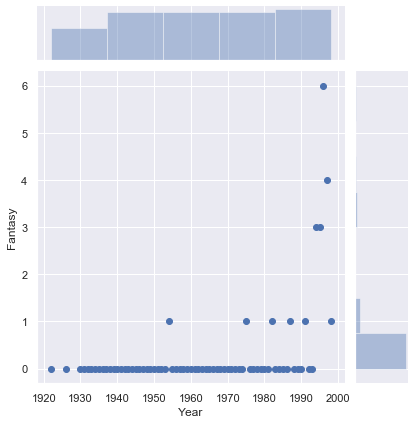

In [411]:
#new_df2['Sum'].value_counts().head(71).plot.bar()
#df3['Sum'].value_counts().head(10).plot.bar()
sns.jointplot(df3['Year'], df3['Action']);
sns.jointplot(df3['Year'], df3['Adventure']);
sns.jointplot(df3['Year'], df3['Childrens']);
sns.jointplot(df3['Year'], df3['Comedy']);
sns.jointplot(df3['Year'], df3[ 'Crime']);
sns.jointplot(df3['Year'], df3['Documentary']);
sns.jointplot(df3['Year'], df3['Drama']);
sns.jointplot(df3['Year'], df3['Fantasy']);


In [410]:
df3.columns

Index(['Year', 'unknown', 'Action', 'Adventure', 'Animation', 'Childrens',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western', 'Sum'],
      dtype='object')

In [238]:
new_df2
new_df2.sum()
df4=new_df2


,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Sum
Year,,,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1926,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1930,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1931,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,3
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6,353
1995,0,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2,381
1996,0,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2,559


unknown           0
Action          251
Adventure       135
Animation        42
Childrens       122
Comedy          505
Crime           109
Documentary      50
Drama           725
Fantasy          22
Film-Noir        24
Horror           92
Musical          56
Mystery          61
Romance         247
Sci-Fi          101
Thriller        251
War              71
Western          27
Sum            2891
dtype: int64

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [256]:
#your answer here
movielens
items
movielens['rating'] > 100
movie=movielens
movie

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1995
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1998
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1998
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1998
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1994


0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: rating, Length: 100000, dtype: bool

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [302]:
movie2=movie.drop(['user id', 'timestamp'], axis=1)
movie2

,movie id,rating
0,242,3
1,302,3
2,377,1
3,51,2
4,346,1
...,...,...
99995,476,3
99996,204,5
99997,1090,1
99998,225,2


In [305]:
movie3 = pd.merge(movie2,items,how='inner', on= 'movie id')
movie3['rating'] > 100
movie3

0        False
1        False
2        False
3        False
4        False
         ...  
99985    False
99986    False
99987    False
99988    False
99989    False
Name: rating, Length: 99990, dtype: bool

,movie id,rating,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year
0,242,3,Kolya,24-Jan-1997,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1997
1,242,3,Kolya,24-Jan-1997,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1997
2,242,5,Kolya,24-Jan-1997,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1997
3,242,3,Kolya,24-Jan-1997,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1997
4,242,5,Kolya,24-Jan-1997,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99985,1674,4,Mamma Roma,01-Jan-1962,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1962
99986,1640,3,"Eighth Day, The",01-Nov-1996,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1996
99987,1637,3,Girls Town,23-Aug-1996,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1996
99988,1630,3,"Silence of the Palace, The (Saimt el Qusur)",02-Feb-1996,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1996


In [317]:
movie3.drop_duplicates(keep=False,inplace=True)
movie3

,movie id,rating,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year
425,377,4,Heavyweights,01-Jan-1994,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1994
872,265,1,"Hunt for Red October, The",01-Jan-1990,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1990
2719,1184,2,"Endless Summer 2, The",01-Jan-1994,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1994
2725,1184,5,"Endless Summer 2, The",01-Jan-1994,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1994
2731,392,1,"Man Without a Face, The",01-Jan-1993,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99985,1674,4,Mamma Roma,01-Jan-1962,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1962
99986,1640,3,"Eighth Day, The",01-Nov-1996,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1996
99987,1637,3,Girls Town,23-Aug-1996,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1996
99988,1630,3,"Silence of the Palace, The (Saimt el Qusur)",02-Feb-1996,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1996


In [312]:
movie3.rating.mean()

2.700840336134454

In [318]:
movie3.columns

Index(['movie id', 'rating', 'movie title', 'release date', 'unknown',
       'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'Year'],
      dtype='object')

In [340]:
#Extract The Movie Titles In a List
movie3
movie4=movie3.drop(['release date', 'unknown',
       'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'Year'], axis=1)
movie4
movie5=movie4.values.tolist()
movie5




,movie id,rating,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year
425,377,4,Heavyweights,01-Jan-1994,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1994
872,265,1,"Hunt for Red October, The",01-Jan-1990,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1990
2719,1184,2,"Endless Summer 2, The",01-Jan-1994,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1994
2725,1184,5,"Endless Summer 2, The",01-Jan-1994,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1994
2731,392,1,"Man Without a Face, The",01-Jan-1993,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99985,1674,4,Mamma Roma,01-Jan-1962,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1962
99986,1640,3,"Eighth Day, The",01-Nov-1996,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1996
99987,1637,3,Girls Town,23-Aug-1996,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1996
99988,1630,3,"Silence of the Palace, The (Saimt el Qusur)",02-Feb-1996,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1996


,movie id,rating,movie title
425,377,4,Heavyweights
872,265,1,"Hunt for Red October, The"
2719,1184,2,"Endless Summer 2, The"
2725,1184,5,"Endless Summer 2, The"
2731,392,1,"Man Without a Face, The"
...,...,...,...
99985,1674,4,Mamma Roma
99986,1640,3,"Eighth Day, The"
99987,1637,3,Girls Town
99988,1630,3,"Silence of the Palace, The (Saimt el Qusur)"


[[377, 4, 'Heavyweights '],
 [265, 1, 'Hunt for Red October, The '],
 [1184, 2, 'Endless Summer 2, The '],
 [1184, 5, 'Endless Summer 2, The '],
 [392, 1, 'Man Without a Face, The '],
 [486, 1, 'Sabrina '],
 [979, 1, 'Trigger Effect, The '],
 [1137, 2, 'Beautiful Thing '],
 [1137, 1, 'Beautiful Thing '],
 [26, 1, 'Brothers McMullen, The '],
 [427, 1, 'To Kill a Mockingbird '],
 [165, 1, 'Jean de Florette '],
 [165, 2, 'Jean de Florette '],
 [480, 2, 'North by Northwest '],
 [54, 1, 'Outbreak '],
 [366, 1, 'Dangerous Minds '],
 [625, 1, 'Sword in the Stone, The '],
 [648, 1, 'Quiet Man, The '],
 [832, 5, 'Bogus '],
 [317, 1, 'In the Name of the Father '],
 [264, 5, 'Mimic '],
 [1147, 5, 'My Family '],
 [1147, 2, 'My Family '],
 [1147, 1, 'My Family '],
 [368, 4, 'Bio-Dome '],
 [368, 5, 'Bio-Dome '],
 [1211, 2, 'Blue Sky '],
 [1211, 5, 'Blue Sky '],
 [787, 4, 'Roommates '],
 [794, 1, 'It Could Happen to You '],
 [79, 1, 'Fugitive, The '],
 [755, 1, 'Jumanji '],
 [360, 2, 'Wonderland '],


In [311]:
sort_movies = movie3.sort_values('rating',ascending=False)
sort_movies

,movie id,rating,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year
96346,1128,5,Heidi Fleiss: Hollywood Madam (,09-Feb-1996,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1996
99114,1238,5,Full Speed,01-Jan-1996,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1996
99068,1237,5,Twisted,01-Jan-1996,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1996
96863,1120,5,I'm Not Rappaport,13-Nov-1996,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1996
96958,353,5,Deep Rising,30-Jan-1998,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64809,736,1,Shadowlands,01-Jan-1993,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1993
85079,643,1,The Innocent,01-Jan-1994,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1994
99417,1496,1,Carpool,23-Aug-1996,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1996
99416,1587,1,Terror in a Texas Town,01-Jan-1958,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1958


In [341]:
filter1 = movie5['5'].isin(["rating"]) 

TypeError: list indices must be integers or slices, not str

### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [345]:
users
movielens
items

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1995
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1998
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1998
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1998
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1994


In [350]:
GD1 = pd.merge(movielens,users,how='outer', on= 'user id')
GD1.sort_values('user id',ascending=True)

,user id,movie id,rating,timestamp,age,gender,occupation,zip code
20397,1,61,4,878542420,24,M,technician,85711
20558,1,270,5,888732827,24,M,technician,85711
20557,1,40,3,876893230,24,M,technician,85711
20556,1,211,3,878541970,24,M,technician,85711
20555,1,141,3,878542608,24,M,technician,85711
...,...,...,...,...,...,...,...,...
99587,943,559,4,888639638,22,M,student,77841
99588,943,121,3,875502096,22,M,student,77841
99589,943,402,2,888639702,22,M,student,77841
99581,943,720,1,888640048,22,M,student,77841


In [353]:
GD2 = pd.merge(GD1,items,how='outer', on= 'movie id')
GD2.sort_values('user id',ascending=True)

,user id,movie id,rating,timestamp,age,gender,occupation,zip code,movie title,release date,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year
30897,1,161,4,875072303,24,M,technician,85711,Top Gun,01-Jan-1986,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1986.0
30527,1,144,4,875073180,24,M,technician,85711,Die Hard,01-Jan-1988,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1988.0
82356,1,41,2,876892818,24,M,technician,85711,Billy Madison,01-Jan-1995,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995.0
5247,1,13,5,875071805,24,M,technician,85711,Mighty Aphrodite,30-Oct-1995,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995.0
24073,1,208,5,878542960,24,M,technician,85711,Young Frankenstein,01-Jan-1974,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1974.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15325,943,568,3,888639042,22,M,student,77841,Speed,01-Jan-1994,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1994.0
42349,943,1047,2,875502146,22,M,student,77841,Multiplicity,12-Jul-1996,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1996.0
43832,943,685,4,875502042,22,M,student,77841,Executive Decision,09-Mar-1996,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1996.0
93741,943,1330,3,888692465,22,M,student,77841,An Unforgettable Summer,01-Jan-1994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1994.0


In [367]:
GD2['gender'].replace('F', 0)
GD2['gender'].replace('M', 1)
GD3=GD2.sort_values('user id',ascending=True)
GD3


0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: gender, Length: 100000, dtype: int64

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: gender, Length: 100000, dtype: int64

,user id,movie id,rating,timestamp,age,gender,occupation,zip code,movie title,release date,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year
30897,1,161,4,875072303,24,0,technician,85711,Top Gun,01-Jan-1986,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1986.0
30527,1,144,4,875073180,24,0,technician,85711,Die Hard,01-Jan-1988,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1988.0
82356,1,41,2,876892818,24,0,technician,85711,Billy Madison,01-Jan-1995,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995.0
5247,1,13,5,875071805,24,0,technician,85711,Mighty Aphrodite,30-Oct-1995,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995.0
24073,1,208,5,878542960,24,0,technician,85711,Young Frankenstein,01-Jan-1974,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1974.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15325,943,568,3,888639042,22,0,student,77841,Speed,01-Jan-1994,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1994.0
42349,943,1047,2,875502146,22,0,student,77841,Multiplicity,12-Jul-1996,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1996.0
43832,943,685,4,875502042,22,0,student,77841,Executive Decision,09-Mar-1996,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1996.0
93741,943,1330,3,888692465,22,0,student,77841,An Unforgettable Summer,01-Jan-1994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1994.0


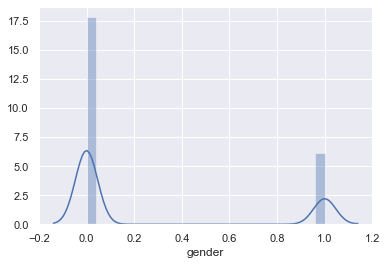

In [380]:
sns.distplot(GD3['gender'])

In [389]:
GD3.columns
GD3[GD3["gender"]==1]["Drama"].sum()
GD3[GD3["gender"]==0]["Drama"].sum()
GD3[GD3["gender"]==1]["Sci-Fi"].sum()
GD3[GD3["gender"]==0]["Sci-Fi"].sum()
GD3[GD3["gender"]==1]["Romance"].sum()
GD3[GD3["gender"]==0]["Romance"].sum()


Index(['user id', 'movie id', 'rating', 'timestamp', 'age', 'gender',
       'occupation', 'zip code', 'movie title', 'release date', 'unknown',
       'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'Year'],
      dtype='object')

11008.0

28887.0

2629.0

10101.0

5858.0

13603.0

Men watch more drama than women = False
Women watch more Sci-Fi than men = False
Men watch more Romance than women = False